In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as ss
%matplotlib inline

In [44]:
def error(alpha, beta, x, y):
    model = beta * x + alpha
    return y - model

def SSE(alpha, beta, x, y):
    return (error(alpha, beta, x, y) ** 2).sum()

def least_squares_fit(x, y):
    correlationxy = ss.pearsonr(x, y)[0]
    beta = correlationxy * np.std(y, ddof=1) / np.std(x, ddof=1)
    alpha = np.mean(y) - beta * np.mean(x)
    return alpha, beta

def total_sum_of_squares(y):
    return ((y - y.mean()) ** 2).sum()

def r_squared(alpha, beta, x, y):
    return 1.0 - (SSE(alpha, beta, x, y) /
                  total_sum_of_squares(y))

In [4]:
df_draft = pd.read_csv('../data/clean_nfl_draft.csv',sep=',')
df_draft.head()

,Player_Id,Year,Rnd,Pick,Tm,Player,Pos,Position Standard,First4AV,Age,...,Rush_Yds,Rush_TDs,Rec,Rec_Yds,Rec_Tds,Tkl,Def_Int,Sk,College/Univ,carrer_years
0,WinsJa00,2015,1.0,1,TAM,Jameis Winston,QB,QB,13,21.0,...,311.0,7.0,0.0,0.0,0.0,0.0,0.0,0,Florida St.,2.0
1,MariMa01,2015,1.0,2,TEN,Marcus Mariota,QB,QB,9,21.0,...,516.0,4.0,1.0,41.0,1.0,0.0,0.0,0,Oregon,2.0
2,FowlDa00,2015,1.0,3,JAX,Dante Fowler,OLB,LB,0,21.0,...,0.0,0.0,0.0,0.0,0.0,16.0,0.0,2.5,Florida,2.0
3,CoopAm00,2015,1.0,4,OAK,Amari Cooper,WR,WR,9,21.0,...,-3.0,0.0,134.0,1970.0,9.0,0.0,0.0,0,Alabama,2.0
4,ScheBr00,2015,1.0,5,WAS,Brandon Scherff,T,T,7,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Iowa,2.0


In [5]:
positions = set(df_draft['Position Standard'])
Positions = {}
info = list()
for pos in positions:
    Positions[pos] = df_draft[df_draft['Position Standard'] == pos]

In [12]:
Positions['C']['carrer_years']

18       2.0
59       2.0
69       1.0
127      2.0
128      2.0
189      1.0
200      2.0
265      3.0
292      3.0
298      3.0
315      3.0
326      2.0
332      3.0
376      3.0
385      3.0
407      2.0
409      3.0
475      4.0
549      4.0
561      3.0
607      4.0
671      4.0
729      3.0
773      5.0
782      1.0
898      4.0
973      6.0
980      6.0
1094     6.0
1113     6.0
        ... 
6090    13.0
6114     2.0
6136    11.0
6218     5.0
6297     6.0
6383    10.0
6412     3.0
6509    16.0
6514     1.0
6518     2.0
6545     1.0
6608     7.0
6625     7.0
6634     4.0
6667     2.0
6689     2.0
6721     4.0
6723     8.0
6732     5.0
6839    12.0
6845    15.0
6870    12.0
6877     3.0
6884     3.0
6893     3.0
6908    15.0
6916    15.0
6944     3.0
6983     8.0
6994     1.0
Name: carrer_years, Length: 187, dtype: float64

In [20]:
model = Positions['QB'][['CarAV','carrer_years']].groupby('carrer_years').mean()
model.head()
x_nn = model.index
y_nn = model.values

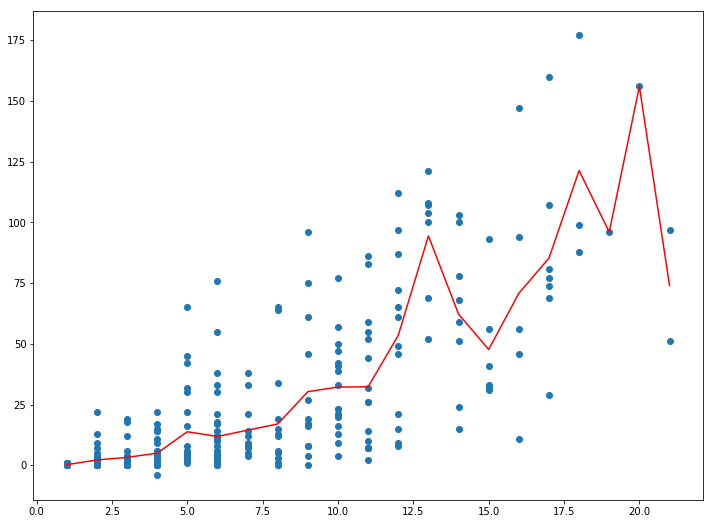

In [22]:
x = Positions['QB']['carrer_years'].values
y = Positions['QB']['CarAV'].values
plt.figure(figsize=(12,9))
plt.plot(x_nn, y_nn, color='red')
plt.scatter(x, y)

In [48]:
model = df_draft[['CarAV','carrer_years']].groupby('carrer_years').median()
model.head()
x_nn = model.index
y_nn = model.values
model = df_draft[['CarAV','carrer_years']].groupby('carrer_years').mean()
model.head()
x_nn_mean = model.index
y_nn_mean = model.values

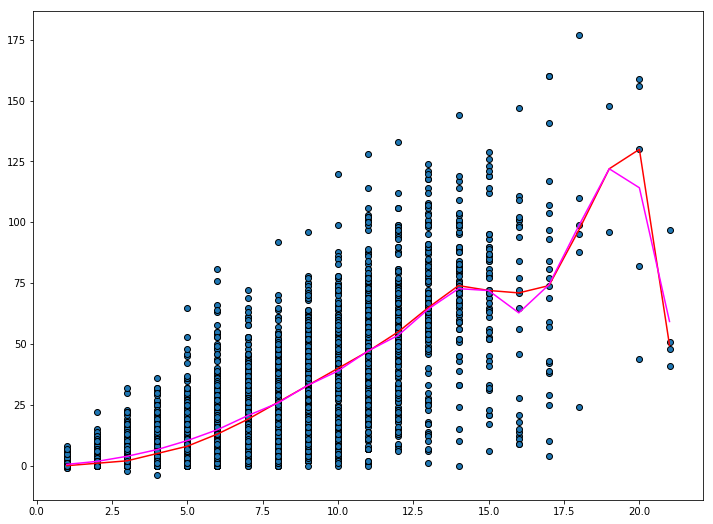

In [49]:
x = df_draft['carrer_years'].values
y = df_draft['CarAV'].values
plt.figure(figsize=(12,9))
plt.plot(x_nn, y_nn, color='red')
plt.plot(x_nn_mean, y_nn_mean, color='magenta')
plt.scatter(x, y, edgecolors='k')

In [32]:
#Usando normalizacao z-score
znorm = df_draft[['CarAV','carrer_years']].copy()
znorm = (znorm - znorm.mean()) / znorm.std(ddof=1)

x = znorm['carrer_years'].copy()
y = znorm['CarAV'].copy()

znorm['carrer_years'] = znorm['carrer_years'].round()
model = znorm.groupby('carrer_years').mean()

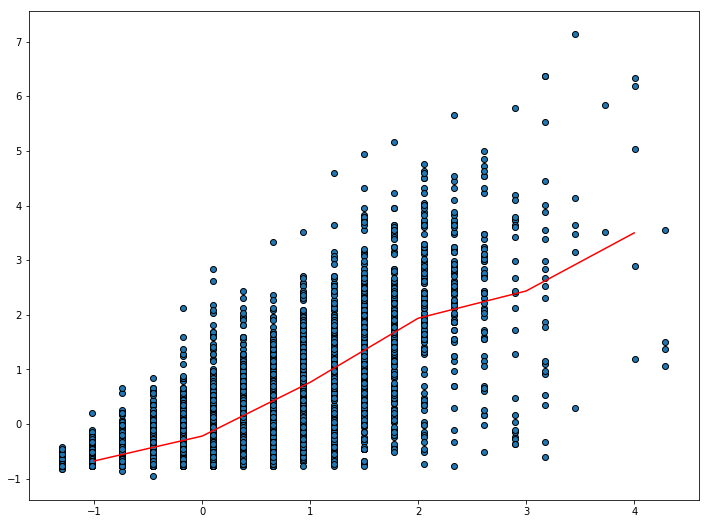

In [34]:
x_nn = model.index
y_nn = model.values
plt.figure(figsize=(12,9))
plt.plot(x_nn, y_nn, color='red')
plt.scatter(x, y,edgecolors='k')

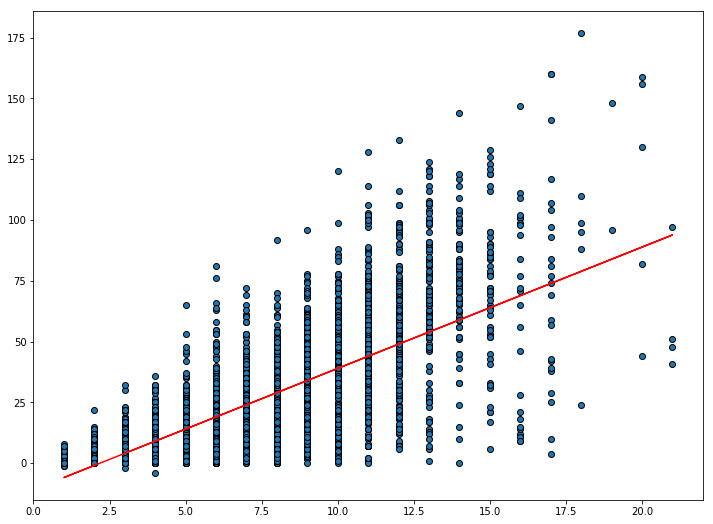

In [41]:
x = df_draft['carrer_years'].values
y = df_draft['CarAV'].values
alpha, beta = least_squares_fit(x, y)
y_model = beta * x + alpha
plt.figure(figsize=(12,9))
plt.scatter(x, y, edgecolors='k')
plt.plot(x, y_model, color='red')

In [42]:
alpha, beta

(-10.864300722724685, 4.987009968254459)

In [45]:
r_squared(alpha, beta, x, y)

0.6358300761681335

In [46]:
r_squared(alpha, beta, x, y) ** 0.5

0.7973895385369271

In [47]:
ss.pearsonr(x,y)[0]

0.7973895385369271